In [ ]:
!pip install kaggle

In [ ]:
import kagglehub
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.nn.functional as F
import shutil
from copy import deepcopy


# Loading Training Data

In [ ]:

path = kagglehub.dataset_download("annavictoria/speed-dating-experiment")

print("Path to dataset files:", path)

100%|██████████| 374k/374k [00:00<00:00, 21.0MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/annavictoria/speed-dating-experiment/versions/1


In [ ]:
old_path = "/root/.cache/kagglehub/datasets/annavictoria/speed-dating-experiment/versions/1/Speed Dating Data.csv"
new_path = "Speed_Dating_Data.csv"

shutil.copy(old_path, new_path)
print("File copied and renamed successfully.")


File copied and renamed successfully.


In [ ]:
import pandas as pd

df = pd.read_csv(
    "Speed_Dating_Data.csv",
    encoding="ISO-8859-1"
)
df = df.dropna(subset=['iid', 'pid', 'match'])

df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


# **Data Reformatting**

In [ ]:
max_id = df[['iid', 'id', 'partner', 'pid']].max()
max_id

,0
iid,552.0
id,22.0
partner,22.0
pid,552.0


In [ ]:
df[df["pid"] == df["iid"]]


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3


We conclude that "iid" and "pid" are referring to the same user ID.

---



**looking_for:** goal

**Hobbies/interests:** 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga'

**Values:** 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1'

**Personality:** 'attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1', 'amb3_1'

**interests:** Inverse of 'gender'

**faculty:** 'field_cd'

**age:** age

**gender:** gender




In [ ]:
columns = ['iid','pid','wave','goal','sports','tvsports','exercise','dining','museums','art','hiking','gaming','clubbing','reading','tv','theater','movies','concerts','music','shopping','yoga',
    'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1','shar1_1','attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1', 'amb3_1', 'gender' , 'field_cd', 'age', 'match']

In [ ]:
df[columns]

,iid,pid,wave,goal,sports,tvsports,exercise,dining,museums,art,...,shar1_1,attr3_1,sinc3_1,intel3_1,fun3_1,amb3_1,gender,field_cd,age,match
0,1,11.0,1,2.0,9.0,2.0,8.0,9.0,1.0,1.0,...,15.0,6.0,8.0,8.0,8.0,7.0,0,1.0,21.0,0
1,1,12.0,1,2.0,9.0,2.0,8.0,9.0,1.0,1.0,...,15.0,6.0,8.0,8.0,8.0,7.0,0,1.0,21.0,0
2,1,13.0,1,2.0,9.0,2.0,8.0,9.0,1.0,1.0,...,15.0,6.0,8.0,8.0,8.0,7.0,0,1.0,21.0,1
3,1,14.0,1,2.0,9.0,2.0,8.0,9.0,1.0,1.0,...,15.0,6.0,8.0,8.0,8.0,7.0,0,1.0,21.0,1
4,1,15.0,1,2.0,9.0,2.0,8.0,9.0,1.0,1.0,...,15.0,6.0,8.0,8.0,8.0,7.0,0,1.0,21.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,552,526.0,21,1.0,8.0,2.0,5.0,10.0,10.0,10.0,...,0.0,8.0,7.0,7.0,6.0,7.0,1,18.0,25.0,0
8374,552,527.0,21,1.0,8.0,2.0,5.0,10.0,10.0,10.0,...,0.0,8.0,7.0,7.0,6.0,7.0,1,18.0,25.0,0
8375,552,528.0,21,1.0,8.0,2.0,5.0,10.0,10.0,10.0,...,0.0,8.0,7.0,7.0,6.0,7.0,1,18.0,25.0,0
8376,552,529.0,21,1.0,8.0,2.0,5.0,10.0,10.0,10.0,...,0.0,8.0,7.0,7.0,6.0,7.0,1,18.0,25.0,0


In [ ]:
df[columns].isnull().sum()


,0
iid,0
pid,0
wave,0
goal,79
sports,79
tvsports,79
exercise,79
dining,79
museums,79
art,79


In [ ]:
formatted_df = df[columns].copy()

In [ ]:
formatted_df = formatted_df.dropna(subset=columns)

In [ ]:
formatted_df.head()

,iid,pid,wave,goal,sports,tvsports,exercise,dining,museums,art,...,shar1_1,attr3_1,sinc3_1,intel3_1,fun3_1,amb3_1,gender,field_cd,age,match
0,1,11.0,1,2.0,9.0,2.0,8.0,9.0,1.0,1.0,...,15.0,6.0,8.0,8.0,8.0,7.0,0,1.0,21.0,0
1,1,12.0,1,2.0,9.0,2.0,8.0,9.0,1.0,1.0,...,15.0,6.0,8.0,8.0,8.0,7.0,0,1.0,21.0,0
2,1,13.0,1,2.0,9.0,2.0,8.0,9.0,1.0,1.0,...,15.0,6.0,8.0,8.0,8.0,7.0,0,1.0,21.0,1
3,1,14.0,1,2.0,9.0,2.0,8.0,9.0,1.0,1.0,...,15.0,6.0,8.0,8.0,8.0,7.0,0,1.0,21.0,1
4,1,15.0,1,2.0,9.0,2.0,8.0,9.0,1.0,1.0,...,15.0,6.0,8.0,8.0,8.0,7.0,0,1.0,21.0,1


Replace Keys and Values

Relationship Goal

💗 Long-term Partner

🌷 Long-term but casual OK

😎 Casual but long-term OK

🌟 Casual Fun

🍦New Friends

🔍 Still figuring it out

Hobbies/Interests

🧳 Travel → ✈️

🍿 Movies & Show

📷 Photography

🥂 Grabbing a drink

🎧 Music

⚽️ Sports

💪🏻 Gym

☕️ Cafe

🌱 Nature

📚 Reading

🎮 Video Games

🍽️ Food

🐶 Pets

🎨 Art

🍳 Cooking

🕺🏼 Dancing

Personality

😸 Cheerful

🫡 Reliable

🤸🏻 Active →⚡️

🤗 Caring

🧑🏻‍💻 Introverted

🧑🏻‍💼 Organized → 🗓️

🧑🏻‍🎨 Creative

🤔 Thoughtful →

🙋🏻 Confident → 😎 (มันซ้ำแต่ชอบอันนี้5555 ใช้ซ้ำจะเปนไรมั้ยนะ)

🙈 Playful → 😜

👩🏻‍🚀Ambitious → 🥇

😌 Calm

😗 Chill

Values (What you want in your relationship)

🤝🏻 Honesty and Trust

🧘🏻 Self-Growth

🥳 Having fun

⚖️ Independence and Balance

🗣️ Meaningful Conversation → 💬

🫂 Emotional Support and Empathy

👄 Physical Affection → 🥰


In [ ]:
#Hobbies Handling
#None: shopping

new_hobbies_names = {
    "sports": "Sports",
    "tvsports": "Sports",
    "museums": "Art",
    "tv": "Movies & Show",
    "exercise": "Gym",
    "dining": "Food",
    "art": "Art",
    "hiking": "Nature",
    "gaming":"Video Games",
    "clubbing": "Grabbing a drink",
    "reading": "Reading",
    "theater": "Movies & Show",
    "movies": "Movies & Show",
    "concerts": "Dancing",
    "music": "Music",
    "yoga":"Gym"
}
def get_hobbies(row):
    hobbies = set()  # Use set to avoid duplicates
    for col, new_name in new_hobbies_names.items():
        if row[col] > 5:  # Apply condition
            hobbies.add(new_name)  # Add mapped hobby name
    return ', '.join(sorted(hobbies))  # Convert set to sorted string

# Apply function to DataFrame
formatted_df["hobbies"] = formatted_df.apply(get_hobbies, axis=1)

In [ ]:
formatted_df.head()

,iid,pid,wave,goal,sports,tvsports,exercise,dining,museums,art,...,attr3_1,sinc3_1,intel3_1,fun3_1,amb3_1,gender,field_cd,age,match,hobbies
0,1,11.0,1,2.0,9.0,2.0,8.0,9.0,1.0,1.0,...,6.0,8.0,8.0,8.0,7.0,0,1.0,21.0,0,"Dancing, Food, Gym, Movies & Show, Music, Read..."
1,1,12.0,1,2.0,9.0,2.0,8.0,9.0,1.0,1.0,...,6.0,8.0,8.0,8.0,7.0,0,1.0,21.0,0,"Dancing, Food, Gym, Movies & Show, Music, Read..."
2,1,13.0,1,2.0,9.0,2.0,8.0,9.0,1.0,1.0,...,6.0,8.0,8.0,8.0,7.0,0,1.0,21.0,1,"Dancing, Food, Gym, Movies & Show, Music, Read..."
3,1,14.0,1,2.0,9.0,2.0,8.0,9.0,1.0,1.0,...,6.0,8.0,8.0,8.0,7.0,0,1.0,21.0,1,"Dancing, Food, Gym, Movies & Show, Music, Read..."
4,1,15.0,1,2.0,9.0,2.0,8.0,9.0,1.0,1.0,...,6.0,8.0,8.0,8.0,7.0,0,1.0,21.0,1,"Dancing, Food, Gym, Movies & Show, Music, Read..."


In [ ]:
formatted_df = formatted_df.drop(columns=new_hobbies_names.keys())
formatted_df = formatted_df.drop(columns=["shopping"])

In [ ]:
#Relationship Goal Handling
goal_mapping = {
    1: "Casual Fun",
    2: "New Friends",
    3: "Long-term/Casual",
    4: "Long-term Partner",
    5: "To say I did it",
    6: "Still figuring it out"
}
formatted_df['goal'] = formatted_df['goal'].replace(goal_mapping)


In [ ]:
#Values Handling
new_column_names = {
    "attr1_1": "Physical Affection",
    "sinc1_1": "Emotional Support and Empathy",
    "intel1_1": "Meaningful Conversation",
    "fun1_1": "Having fun",
    "amb1_1": "Self-Growth",
    "shar1_1": "Meaningful Conversation2"
}
formatted_df.rename(columns=new_column_names, inplace=True)


In [ ]:
formatted_df.head()

,iid,pid,wave,goal,Physical Affection,Emotional Support and Empathy,Meaningful Conversation,Having fun,Self-Growth,Meaningful Conversation2,attr3_1,sinc3_1,intel3_1,fun3_1,amb3_1,gender,field_cd,age,match,hobbies
0,1,11.0,1,New Friends,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,0,1.0,21.0,0,"Dancing, Food, Gym, Movies & Show, Music, Read..."
1,1,12.0,1,New Friends,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,0,1.0,21.0,0,"Dancing, Food, Gym, Movies & Show, Music, Read..."
2,1,13.0,1,New Friends,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,0,1.0,21.0,1,"Dancing, Food, Gym, Movies & Show, Music, Read..."
3,1,14.0,1,New Friends,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,0,1.0,21.0,1,"Dancing, Food, Gym, Movies & Show, Music, Read..."
4,1,15.0,1,New Friends,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,0,1.0,21.0,1,"Dancing, Food, Gym, Movies & Show, Music, Read..."


In [ ]:
attribute_columns = ['Physical Affection', 'Emotional Support and Empathy',
                         'Meaningful Conversation', 'Having fun', 'Self-Growth',
                         'Meaningful Conversation2']

In [ ]:
# Define the function to filter attributes based on wave conditions
def filter_attributes(row, threshold_1_5_10_21=15, threshold_6_9=5):
    wave = row['wave']

    # Determine the threshold based on wave value
    threshold = threshold_1_5_10_21 if (1 <= wave <= 5 or 10 <= wave <= 21) else threshold_6_9

    # Filter attributes that exceed the threshold
    selected_attrs = [col for col in attribute_columns if row[col] > threshold]

    # Handling 'Meaningful Conversation' and 'Meaningful Conversation2'
    if 'Meaningful Conversation' in selected_attrs and 'Meaningful Conversation2' in selected_attrs:
        selected_attrs.remove('Meaningful Conversation2')  # Keep only 'Meaningful Conversation'
    elif 'Meaningful Conversation2' in selected_attrs:
        selected_attrs[selected_attrs.index('Meaningful Conversation2')] = 'Meaningful Conversation'  # Rename

    return ', '.join(selected_attrs)  # Join selected attributes into a string

# Apply the function to create the 'values' column
formatted_df['values'] = formatted_df.apply(filter_attributes, axis=1)
formatted_df = formatted_df.drop(columns=attribute_columns)

# Display the updated DataFrame
print(formatted_df[['wave', 'values']].head())  # Showing only wave and values for brevity


   wave                                             values
0     1  Emotional Support and Empathy, Meaningful Conv...
1     1  Emotional Support and Empathy, Meaningful Conv...
2     1  Emotional Support and Empathy, Meaningful Conv...
3     1  Emotional Support and Empathy, Meaningful Conv...
4     1  Emotional Support and Empathy, Meaningful Conv...


In [ ]:
formatted_df.head()

,iid,pid,wave,goal,attr3_1,sinc3_1,intel3_1,fun3_1,amb3_1,gender,field_cd,age,match,hobbies,values
0,1,11.0,1,New Friends,6.0,8.0,8.0,8.0,7.0,0,1.0,21.0,0,"Dancing, Food, Gym, Movies & Show, Music, Read...","Emotional Support and Empathy, Meaningful Conv..."
1,1,12.0,1,New Friends,6.0,8.0,8.0,8.0,7.0,0,1.0,21.0,0,"Dancing, Food, Gym, Movies & Show, Music, Read...","Emotional Support and Empathy, Meaningful Conv..."
2,1,13.0,1,New Friends,6.0,8.0,8.0,8.0,7.0,0,1.0,21.0,1,"Dancing, Food, Gym, Movies & Show, Music, Read...","Emotional Support and Empathy, Meaningful Conv..."
3,1,14.0,1,New Friends,6.0,8.0,8.0,8.0,7.0,0,1.0,21.0,1,"Dancing, Food, Gym, Movies & Show, Music, Read...","Emotional Support and Empathy, Meaningful Conv..."
4,1,15.0,1,New Friends,6.0,8.0,8.0,8.0,7.0,0,1.0,21.0,1,"Dancing, Food, Gym, Movies & Show, Music, Read...","Emotional Support and Empathy, Meaningful Conv..."


In [ ]:
#Personality Handling
new_column_personality = {
    "attr3_1": "Confident",
    "sinc3_1": "Caring",
    "intel3_1": "Reliable, Organized, Thoughtful",
    "fun3_1": "Cheerful, Active, Playful",
    "amb3_1": "Ambitious",
}
formatted_df.rename(columns=new_column_personality, inplace=True)


In [ ]:
formatted_df.columns

Index(['iid', 'pid', 'wave', 'goal', 'Confident', 'Caring',
       'Reliable, Organized, Thoughtful', 'Cheerful, Active, Playful',
       'Ambitious', 'gender', 'field_cd', 'age', 'match', 'hobbies', 'values'],
      dtype='object')

In [ ]:
personality_columns = ["Confident", "Caring", "Reliable, Organized, Thoughtful", "Cheerful, Active, Playful", "Ambitious"]

In [ ]:
formatted_df['Personality'] = formatted_df[personality_columns].apply(lambda row: ', '.join(row.index[row > 5]), axis=1)
formatted_df = formatted_df.drop(columns=personality_columns)
formatted_df.head()

,iid,pid,wave,goal,gender,field_cd,age,match,hobbies,values,Personality
0,1,11.0,1,New Friends,0,1.0,21.0,0,"Dancing, Food, Gym, Movies & Show, Music, Read...","Emotional Support and Empathy, Meaningful Conv...","Confident, Caring, Reliable, Organized, Though..."
1,1,12.0,1,New Friends,0,1.0,21.0,0,"Dancing, Food, Gym, Movies & Show, Music, Read...","Emotional Support and Empathy, Meaningful Conv...","Confident, Caring, Reliable, Organized, Though..."
2,1,13.0,1,New Friends,0,1.0,21.0,1,"Dancing, Food, Gym, Movies & Show, Music, Read...","Emotional Support and Empathy, Meaningful Conv...","Confident, Caring, Reliable, Organized, Though..."
3,1,14.0,1,New Friends,0,1.0,21.0,1,"Dancing, Food, Gym, Movies & Show, Music, Read...","Emotional Support and Empathy, Meaningful Conv...","Confident, Caring, Reliable, Organized, Though..."
4,1,15.0,1,New Friends,0,1.0,21.0,1,"Dancing, Food, Gym, Movies & Show, Music, Read...","Emotional Support and Empathy, Meaningful Conv...","Confident, Caring, Reliable, Organized, Though..."


In [ ]:
#Interests
formatted_df['interests'] = 1 - formatted_df['gender']


6 : THE SIRINDHORN THAI LANGUAGE INSTITUTE

18 (20%): GRADUATE SCHOOL

5: FACULTY OF ENGINEERING

7: FACULTY OF ARTS

2, 10: FACULTY OF SCIENCE

13: FACULTY OF POLITICAL SCIENCE

17: FACULTY OF ARCHITECTURE

8 (33%): FACULTY OF COMMERCE AND ACCOUNTANCY

9: FACULTY OF EDUCATION

14: FACULTY OF COMMUNICATION ARTS

8 (33%): FACULTY OF ECONOMICS

4 (16.67%) : FACULTY OF MEDICINE

4 (16.67%) : FACULTY OF VETERINARY SCIENCE

4 (16.67%): FACULTY OF DENTISTRY

4 (16.67%): FACULTY OF PHARMACEUTICAL SCIENCES

1 : FACULTY OF LAW

15 : FACULTY OF FINE AND APPLIED ARTS

4 (16.67%): FACULTY OF NURSING

4 (16.67%): FACULTY OF ALLIED HEALTH SCIENCES

3: FACULTY OF PSYCHOLOGY

18 (20%): FACULTY OF SPORTS SCIENCE

18 (20%): SCHOOL OF AGRICULTURAL RESOURCES

18 (20%): COLLEGE OF POPULATION STUDIES

11: COLLEGE OF PUBLIC HEALTH SCIENCES

16 :LANGUAGE INSTITUTE

18 (20%): SCHOOL OF INTEGRATED INNOVATION

8 (33%): SASIN GRADUATE INSTITUTE OF BUSINESS ADMINISTION

12: UNKNOWN

28 Total Faculties

In [ ]:
#Faculty
def custom_faculty_mapping(df):
    # Set seed for reproducibility
    np.random.seed(42)

    # Mapping: direct assignments
    direct_map = {
        1: "FACULTY OF LAW",
        2: "FACULTY OF SCIENCE",
        3: "FACULTY OF PSYCHOLOGY",
        5: "FACULTY OF ENGINEERING",
        6: "THE SIRINDHORN THAI LANGUAGE INSTITUTE",
        7: "FACULTY OF ARTS",
        9: "FACULTY OF EDUCATION",
        10: "FACULTY OF SCIENCE",
        11: "COLLEGE OF PUBLIC HEALTH SCIENCES",
        13: "FACULTY OF POLITICAL SCIENCE",
        14: "FACULTY OF COMMUNICATION ARTS",
        15: "FACULTY OF FINE AND APPLIED ARTS",
        16: "LANGUAGE INSTITUTE",
        17: "FACULTY OF ARCHITECTURE"
    }

    # Code 4 split into 6 faculties (each 1/6 = ~16.67%)
    faculty_4_options = [
        "FACULTY OF MEDICINE",
        "FACULTY OF VETERINARY SCIENCE",
        "FACULTY OF DENTISTRY",
        "FACULTY OF PHARMACEUTICAL SCIENCES",
        "FACULTY OF NURSING",
        "FACULTY OF ALLIED HEALTH SCIENCES"
    ]

    # Code 8 split into 3 faculties (each ~33.33%)
    faculty_8_options = [
        "FACULTY OF COMMERCE AND ACCOUNTANCY",
        "FACULTY OF ECONOMICS",
        "SASIN GRADUATE INSTITUTE OF BUSINESS ADMINISTION"
    ]

    # Code 18 split into 4 faculties (each 25% or one-fifth if you go with 5)
    faculty_18_options = [
        "GRADUATE SCHOOL",
        "FACULTY OF SPORTS SCIENCE",
        "SCHOOL OF AGRICULTURAL RESOURCES",
        "COLLEGE OF POPULATION STUDIES",
        "SCHOOL OF INTEGRATED INNOVATION"
    ]

    # Function to map each row
    def map_row(code):
        if code in direct_map:
            return direct_map[code]
        elif code == 4:
            return np.random.choice(faculty_4_options)
        elif code == 8:
            return np.random.choice(faculty_8_options)
        elif code == 18:
            return np.random.choice(faculty_18_options)
        else:
            return "UNKNOWN"

    df["faculty"] = df["field_cd"].apply(map_row)
    df = df.drop(columns = ["field_cd"])
    return df
formatted_df = custom_faculty_mapping(formatted_df)

In [ ]:
#Gender
formatted_df['gender'] = formatted_df['gender'].map({0: 'Female', 1: 'Male'})
formatted_df['interests'] = formatted_df['interests'].map({0: 'Female', 1: 'Male'})


In [ ]:
formatted_df.head()

,iid,pid,wave,goal,gender,age,match,hobbies,values,Personality,interests,faculty
0,1,11.0,1,New Friends,Female,21.0,0,"Dancing, Food, Gym, Movies & Show, Music, Read...","Emotional Support and Empathy, Meaningful Conv...","Confident, Caring, Reliable, Organized, Though...",Male,FACULTY OF LAW
1,1,12.0,1,New Friends,Female,21.0,0,"Dancing, Food, Gym, Movies & Show, Music, Read...","Emotional Support and Empathy, Meaningful Conv...","Confident, Caring, Reliable, Organized, Though...",Male,FACULTY OF LAW
2,1,13.0,1,New Friends,Female,21.0,1,"Dancing, Food, Gym, Movies & Show, Music, Read...","Emotional Support and Empathy, Meaningful Conv...","Confident, Caring, Reliable, Organized, Though...",Male,FACULTY OF LAW
3,1,14.0,1,New Friends,Female,21.0,1,"Dancing, Food, Gym, Movies & Show, Music, Read...","Emotional Support and Empathy, Meaningful Conv...","Confident, Caring, Reliable, Organized, Though...",Male,FACULTY OF LAW
4,1,15.0,1,New Friends,Female,21.0,1,"Dancing, Food, Gym, Movies & Show, Music, Read...","Emotional Support and Empathy, Meaningful Conv...","Confident, Caring, Reliable, Organized, Though...",Male,FACULTY OF LAW


We now have data in the same format that we will be using.

# Preparing Data

In [ ]:
# Function to extract unique values from a column
def get_unique_values(series):
    unique_values = set()
    for row in series.dropna():  # Drop NaN values if any
        items = row.split(',')  # Split by comma
        items = [item.strip('"') for item in items]  # Remove double quotes
        unique_values.update(items)  # Add to set for uniqueness
    return unique_values

In [ ]:
for col in formatted_df.columns:
    if col not in ['iid','pid']:
      if col in ['hobbies', 'values', 'Personality']:
        unique_values = get_unique_values(formatted_df[col])
        print(f"Column '{col}': {unique_values}")
      else:
        print(f"Column '{col}': {formatted_df[col].unique()}")

Column 'wave': [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Column 'goal': ['New Friends' 'Casual Fun' 'Still figuring it out' 'Long-term/Casual'
 'Long-term Partner' 'To say I did it']
Column 'gender': ['Female' 'Male']
Column 'age': [21. 24. 25. 23. 22. 26. 27. 30. 28. 29. 34. 35. 32. 39. 20. 19. 18. 37.
 33. 36. 31. 42. 38. 55.]
Column 'match': [0 1]
Column 'hobbies': {' Music', '', 'Dancing', ' Grabbing a drink', ' Food', ' Gym', ' Video Games', 'Gym', ' Dancing', ' Nature', ' Reading', 'Food', ' Movies & Show', 'Art', 'Grabbing a drink', 'Nature', ' Sports'}
Column 'values': {'Emotional Support and Empathy', ' Meaningful Conversation', ' Emotional Support and Empathy', 'Having fun', ' Self-Growth', ' Having fun', 'Physical Affection', 'Meaningful Conversation'}
Column 'Personality': {'', 'Ambitious', ' Cheerful', 'Reliable', 'Confident', ' Organized', 'Caring', ' Active', ' Playful', ' Caring', ' Thoughtful', ' Reliable', ' Ambitious'}
Column 'interests': ['Mal

In [ ]:
formatted_df[formatted_df['faculty'] == "UNKNOWN"]

,iid,pid,wave,goal,gender,age,match,hobbies,values,Personality,interests,faculty
656,48,21.0,2,Casual Fun,Male,22.0,0,"Art, Dancing, Food, Grabbing a drink, Gym, Mov...","Physical Affection, Meaningful Conversation, H...","Confident, Caring, Reliable, Organized, Though...",Female,UNKNOWN
657,48,22.0,2,Casual Fun,Male,22.0,0,"Art, Dancing, Food, Grabbing a drink, Gym, Mov...","Physical Affection, Meaningful Conversation, H...","Confident, Caring, Reliable, Organized, Though...",Female,UNKNOWN
658,48,23.0,2,Casual Fun,Male,22.0,0,"Art, Dancing, Food, Grabbing a drink, Gym, Mov...","Physical Affection, Meaningful Conversation, H...","Confident, Caring, Reliable, Organized, Though...",Female,UNKNOWN
659,48,24.0,2,Casual Fun,Male,22.0,0,"Art, Dancing, Food, Grabbing a drink, Gym, Mov...","Physical Affection, Meaningful Conversation, H...","Confident, Caring, Reliable, Organized, Though...",Female,UNKNOWN
660,48,25.0,2,Casual Fun,Male,22.0,0,"Art, Dancing, Food, Grabbing a drink, Gym, Mov...","Physical Affection, Meaningful Conversation, H...","Confident, Caring, Reliable, Organized, Though...",Female,UNKNOWN
661,48,26.0,2,Casual Fun,Male,22.0,0,"Art, Dancing, Food, Grabbing a drink, Gym, Mov...","Physical Affection, Meaningful Conversation, H...","Confident, Caring, Reliable, Organized, Though...",Female,UNKNOWN
662,48,27.0,2,Casual Fun,Male,22.0,0,"Art, Dancing, Food, Grabbing a drink, Gym, Mov...","Physical Affection, Meaningful Conversation, H...","Confident, Caring, Reliable, Organized, Though...",Female,UNKNOWN
663,48,28.0,2,Casual Fun,Male,22.0,0,"Art, Dancing, Food, Grabbing a drink, Gym, Mov...","Physical Affection, Meaningful Conversation, H...","Confident, Caring, Reliable, Organized, Though...",Female,UNKNOWN
664,48,29.0,2,Casual Fun,Male,22.0,0,"Art, Dancing, Food, Grabbing a drink, Gym, Mov...","Physical Affection, Meaningful Conversation, H...","Confident, Caring, Reliable, Organized, Though...",Female,UNKNOWN
665,48,30.0,2,Casual Fun,Male,22.0,0,"Art, Dancing, Food, Grabbing a drink, Gym, Mov...","Physical Affection, Meaningful Conversation, H...","Confident, Caring, Reliable, Organized, Though...",Female,UNKNOWN


In [ ]:
df[df['iid'] == 48]['field_cd']

,field_cd
656,12.0
657,12.0
658,12.0
659,12.0
660,12.0
661,12.0
662,12.0
663,12.0
664,12.0
665,12.0


In [ ]:
#Creating one hot encoding
relationship_goal_map = [
    "goal_Long-term Partner",
    "goal_Long-term/Casual",
    "goal_Casual Fun",
    "goal_New Friends",
    "goal_Still figuring it out",
    "goal_To say I did it"
]

hobbies_map = [
    "hobbies_Travel",
    "hobbies_Movies & Show",
    "hobbies_Photography",
    "hobbies_Grabbing a drink",
    "hobbies_Music",
    "hobbies_Sports",
    "hobbies_Gym",
    "hobbies_Cafe",
    "hobbies_Nature",
    "hobbies_Reading",
    "hobbies_Video Games",
    "hobbies_Food",
    "hobbies_Pets",
    "hobbies_Art",
    "hobbies_Cooking",
    "hobbies_Dancing"
]

personality_map = [
    "personality_Cheerful",
    "personality_Reliable",
    "personality_Active",
    "personality_Caring",
    "personality_Introverted",
    "personality_Organized",
    "personality_Creative",
    "personality_Thoughtful",
    "personality_Confident",
    "personality_Playful",
    "personality_Ambitious",
    "personality_Calm",
    "personality_Chill"
]

values_map = [
    "values_Honesty and Trust",
    "values_Self-Growth",
    "values_Having fun",
    "values_Independence and Balance",
    "values_Meaningful Conversation",
    "values_Emotional Support and Empathy",
    "values_Physical Affection"
]

faculties_map = [f"faculties_{fac}"
                for fac in formatted_df["faculty"].dropna().unique()]


In [ ]:
len(faculties_map)

28

**Concerns:** length of faculties should be 28. If not the randomization does not include some of the faculties

In [ ]:
# Create a new DataFrame with one-hot encoding
one_hot_df = pd.DataFrame()

for fac in faculties_map:
    one_hot_df[fac] = formatted_df['faculty'].apply(lambda x: 1 if fac.split("_")[1] in x else 0)

for goal in relationship_goal_map:
    one_hot_df[goal] = formatted_df["goal"].apply(lambda x: 1 if goal.split("_")[1] in x else 0)

# One-hot encode hobbies
for hobby in hobbies_map:
    one_hot_df[hobby] = formatted_df["hobbies"].apply(lambda x: 1 if hobby.split("_")[1] in x else 0)

# One-hot encode personality traits
for trait in personality_map:
    one_hot_df[trait] = formatted_df["Personality"].apply(lambda x: 1 if trait.split("_")[1] in x else 0)

# One-hot encode values
for value in values_map:
    one_hot_df[value] = formatted_df["values"].apply(lambda x: 1 if value.split("_")[1] in x else 0)

# Display final DataFrame
print(one_hot_df.head())

   faculties_FACULTY OF LAW  faculties_FACULTY OF SCIENCE  \
0                         1                             0   
1                         1                             0   
2                         1                             0   
3                         1                             0   
4                         1                             0   

   faculties_FACULTY OF POLITICAL SCIENCE  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   faculties_SASIN GRADUATE INSTITUTE OF BUSINESS ADMINISTION  \
0                                                  0            
1                                                  0            
2                                                  0            
3                                                  0            
4                                    

In [ ]:
one_hot_df.columns

Index(['faculties_FACULTY OF LAW', 'faculties_FACULTY OF SCIENCE',
       'faculties_FACULTY OF POLITICAL SCIENCE',
       'faculties_SASIN GRADUATE INSTITUTE OF BUSINESS ADMINISTION',
       'faculties_FACULTY OF COMMERCE AND ACCOUNTANCY',
       'faculties_FACULTY OF ECONOMICS', 'faculties_FACULTY OF ENGINEERING',
       'faculties_FACULTY OF EDUCATION', 'faculties_FACULTY OF PSYCHOLOGY',
       'faculties_COLLEGE OF PUBLIC HEALTH SCIENCES', 'faculties_UNKNOWN',
       'faculties_FACULTY OF DENTISTRY',
       'faculties_FACULTY OF ALLIED HEALTH SCIENCES',
       'faculties_FACULTY OF PHARMACEUTICAL SCIENCES',
       'faculties_FACULTY OF VETERINARY SCIENCE',
       'faculties_FACULTY OF NURSING', 'faculties_FACULTY OF MEDICINE',
       'faculties_FACULTY OF ARTS',
       'faculties_THE SIRINDHORN THAI LANGUAGE INSTITUTE',
       'faculties_FACULTY OF COMMUNICATION ARTS',
       'faculties_LANGUAGE INSTITUTE',
       'faculties_FACULTY OF FINE AND APPLIED ARTS',
       'faculties_FACU

In [ ]:
#gender map
gender_map = ['gender_Male','gender_Female']
for gender in gender_map:
    one_hot_df[gender] = formatted_df["gender"].apply(lambda x: 1 if gender.split("_")[1] == x else 0)
one_hot_df['age'] = formatted_df['age'].astype(int)
interests_map = ['interests_Male','interests_Female']
for interest in interests_map:
    one_hot_df[interest] = formatted_df["interests"].apply(lambda x: 1 if interest.split("_")[1] == x else 0)
one_hot_df.head()

,faculties_FACULTY OF LAW,faculties_FACULTY OF SCIENCE,faculties_FACULTY OF POLITICAL SCIENCE,faculties_SASIN GRADUATE INSTITUTE OF BUSINESS ADMINISTION,faculties_FACULTY OF COMMERCE AND ACCOUNTANCY,faculties_FACULTY OF ECONOMICS,faculties_FACULTY OF ENGINEERING,faculties_FACULTY OF EDUCATION,faculties_FACULTY OF PSYCHOLOGY,faculties_COLLEGE OF PUBLIC HEALTH SCIENCES,...,values_Having fun,values_Independence and Balance,values_Meaningful Conversation,values_Emotional Support and Empathy,values_Physical Affection,gender_Male,gender_Female,age,interests_Male,interests_Female
0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,21,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,21,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,21,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,21,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,21,1,0


In [ ]:
one_hot_df['iid'] = formatted_df['iid']
one_hot_df['pid'] = formatted_df['pid']
one_hot_df['match'] = formatted_df['match']
one_hot_df.head()

,faculties_FACULTY OF LAW,faculties_FACULTY OF SCIENCE,faculties_FACULTY OF POLITICAL SCIENCE,faculties_SASIN GRADUATE INSTITUTE OF BUSINESS ADMINISTION,faculties_FACULTY OF COMMERCE AND ACCOUNTANCY,faculties_FACULTY OF ECONOMICS,faculties_FACULTY OF ENGINEERING,faculties_FACULTY OF EDUCATION,faculties_FACULTY OF PSYCHOLOGY,faculties_COLLEGE OF PUBLIC HEALTH SCIENCES,...,values_Emotional Support and Empathy,values_Physical Affection,gender_Male,gender_Female,age,interests_Male,interests_Female,iid,pid,match
0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,21,1,0,1,11.0,0
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,21,1,0,1,12.0,0
2,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,21,1,0,1,13.0,1
3,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,21,1,0,1,14.0,1
4,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,21,1,0,1,15.0,1


In [ ]:
min_age = one_hot_df["age"].min()
max_age = one_hot_df["age"].max()

one_hot_df["age"] = (one_hot_df["age"] - min_age) / (max_age - min_age)

# Autoencoder training

In [ ]:
train_data, temp = train_test_split(one_hot_df, test_size=0.2, random_state=42)
val, test = train_test_split(temp, test_size=0.5, random_state = 0)
len(train_data), len(val), len(test)

(6545, 818, 819)

In [ ]:
class user_AE(nn.Module):
    def __init__(self, input_dim=75, latent_dim=8):
        super(user_AE, self).__init__()
        self.input_dim = input_dim
        self.latent_dim = latent_dim
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, latent_dim),
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, input_dim),
            nn.Sigmoid()  # Use Tanh or Sigmoid based on your data
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [ ]:
train_df = train_data.drop_duplicates(subset='iid', keep='first')
val_df = val.drop_duplicates(subset='iid', keep='first')
test_df = test.drop_duplicates(subset='iid', keep='first')


train_df = train_df.drop(columns=['iid', 'pid', 'match'], errors='ignore')
val_df = val_df.drop(columns=['iid', 'pid', 'match'], errors='ignore')
test_df = test_df.drop(columns=['iid', 'pid', 'match'], errors='ignore')


train_df = torch.tensor(train_df.values, dtype=torch.float32)
val_df = torch.tensor(val_df.values, dtype=torch.float32)
test_df = torch.tensor(test_df.values, dtype=torch.float32)


In [ ]:
def evaluate(model, df):
    model.eval()
    y_pred = model(df)
    loss = F.mse_loss(y_pred, df)
    return loss.item()

def plot_loss(train_loss_record, val_loss_record):
    epochs = range(1, len(train_loss_record) + 1)

    plt.figure(figsize=(10, 6))

    plt.plot(epochs, train_loss_record, label='Training Loss', color='blue', marker='o')

    plt.plot(epochs, val_loss_record, label='Validation Loss', color='red', marker='x')

    plt.title('Training and Validation Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    plt.legend()

    plt.grid(True)
    plt.show()

def get_model_path(model, epoch, lr, wd):
    model_path = f"lt{model.latent_dim}_lr{lr}_wd{wd}_epoch{epoch}"
    return model_path

def train(model, num_epochs=10, lr = 0.01, wd = 0.0, print_loss=True, binary = False):
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=wd)
    model.train()

    train_loss_record = []
    val_loss_record = []
    for i in range(num_epochs):
        y_pred = model(train_df)
        loss = F.mse_loss(y_pred, train_df)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        val_loss = evaluate(model, val_df)

        if print_loss == True:
            print(f"Epoch {i}, Training Loss: {loss.item():.3f}")
            print(f"Epoch {i}, Validation Loss: {val_loss:.3f}")
        train_loss_record.append(loss.item())
        val_loss_record.append(val_loss)
        model_path = get_model_path(model, i, lr, wd)
        torch.save(model.state_dict(), model_path)
    return train_loss_record, val_loss_record


In [ ]:
AE = user_AE()
train_loss_record, val_loss_record = train(AE, num_epochs=50, lr=0.005, print_loss=True)

Epoch 0, Training Loss: 0.248
Epoch 0, Validation Loss: 0.244
Epoch 1, Training Loss: 0.244
Epoch 1, Validation Loss: 0.241
Epoch 2, Training Loss: 0.241
Epoch 2, Validation Loss: 0.237
Epoch 3, Training Loss: 0.237
Epoch 3, Validation Loss: 0.233
Epoch 4, Training Loss: 0.233
Epoch 4, Validation Loss: 0.229
Epoch 5, Training Loss: 0.229
Epoch 5, Validation Loss: 0.223
Epoch 6, Training Loss: 0.223
Epoch 6, Validation Loss: 0.217
Epoch 7, Training Loss: 0.217
Epoch 7, Validation Loss: 0.210
Epoch 8, Training Loss: 0.210
Epoch 8, Validation Loss: 0.201
Epoch 9, Training Loss: 0.201
Epoch 9, Validation Loss: 0.190
Epoch 10, Training Loss: 0.190
Epoch 10, Validation Loss: 0.177
Epoch 11, Training Loss: 0.177
Epoch 11, Validation Loss: 0.162
Epoch 12, Training Loss: 0.162
Epoch 12, Validation Loss: 0.146
Epoch 13, Training Loss: 0.146
Epoch 13, Validation Loss: 0.129
Epoch 14, Training Loss: 0.129
Epoch 14, Validation Loss: 0.114
Epoch 15, Training Loss: 0.114
Epoch 15, Validation Loss: 0.

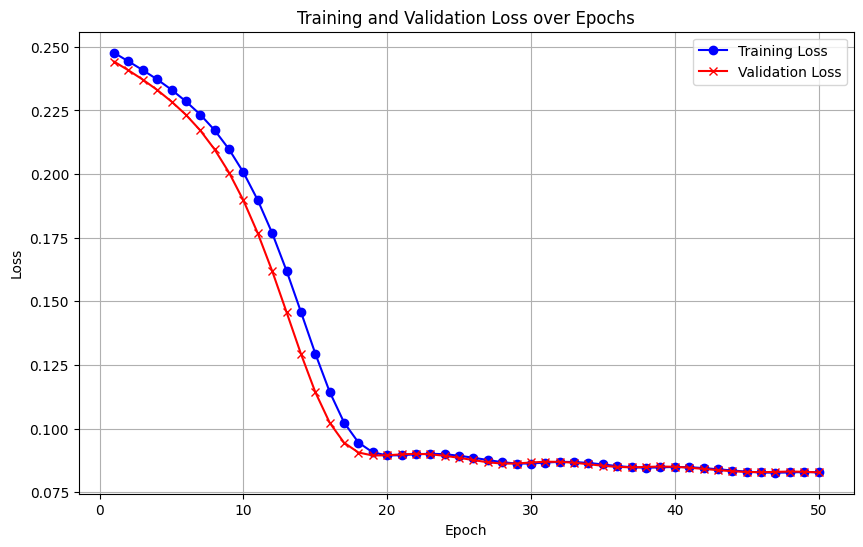

In [ ]:
plot_loss(train_loss_record, val_loss_record)

# Collaborative Filtering Training

**Data Formatting -> Creating users, partners, match dataframe**

In [ ]:
train_data.head()

,faculties_FACULTY OF LAW,faculties_FACULTY OF SCIENCE,faculties_FACULTY OF POLITICAL SCIENCE,faculties_SASIN GRADUATE INSTITUTE OF BUSINESS ADMINISTION,faculties_FACULTY OF COMMERCE AND ACCOUNTANCY,faculties_FACULTY OF ECONOMICS,faculties_FACULTY OF ENGINEERING,faculties_FACULTY OF EDUCATION,faculties_FACULTY OF PSYCHOLOGY,faculties_COLLEGE OF PUBLIC HEALTH SCIENCES,...,values_Emotional Support and Empathy,values_Physical Affection,gender_Male,gender_Female,age,interests_Male,interests_Female,iid,pid,match
5939,1,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0.081081,1,0,389,402.0,0
3301,0,1,0,0,0,0,0,0,0,0,...,1,1,1,0,0.162162,0,1,228,207.0,0
7342,0,1,0,0,0,0,0,0,0,0,...,1,1,0,1,0.189189,1,0,498,504.0,0
7505,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0.135135,1,0,513,538.0,0
434,0,1,0,0,0,0,0,0,0,0,...,1,1,0,1,0.189189,1,0,35,50.0,1


Partner Handling

In [ ]:
def generate_partner_df(df):
    partner_df = df[['pid']].copy()

    # For each attribute column in the original dataframe
    for column in df.columns:
        if column not in ['iid', 'pid', 'match']:
            # Create a mapping from iid to the attribute value
            id_to_attr = dict(zip(one_hot_df['iid'], one_hot_df[column]))

            # Map the pid to the partner's attribute value
            partner_df[f'partner_{column}'] = partner_df['pid'].map(id_to_attr)
    return partner_df

train_partner = generate_partner_df(train_data)
val_partner = generate_partner_df(val)
test_partner = generate_partner_df(test)

train_partner.head()

,pid,partner_faculties_FACULTY OF LAW,partner_faculties_FACULTY OF SCIENCE,partner_faculties_FACULTY OF POLITICAL SCIENCE,partner_faculties_SASIN GRADUATE INSTITUTE OF BUSINESS ADMINISTION,partner_faculties_FACULTY OF COMMERCE AND ACCOUNTANCY,partner_faculties_FACULTY OF ECONOMICS,partner_faculties_FACULTY OF ENGINEERING,partner_faculties_FACULTY OF EDUCATION,partner_faculties_FACULTY OF PSYCHOLOGY,...,partner_values_Having fun,partner_values_Independence and Balance,partner_values_Meaningful Conversation,partner_values_Emotional Support and Empathy,partner_values_Physical Affection,partner_gender_Male,partner_gender_Female,partner_age,partner_interests_Male,partner_interests_Female
5939,402.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.297297,0.0,1.0
3301,207.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.135135,1.0,0.0
7342,504.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.135135,0.0,1.0
7505,538.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.378378,0.0,1.0
434,50.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.243243,0.0,1.0


In [ ]:
train_partner.isnull().sum()


,0
pid,0
partner_faculties_FACULTY OF LAW,149
partner_faculties_FACULTY OF SCIENCE,149
partner_faculties_FACULTY OF POLITICAL SCIENCE,149
partner_faculties_SASIN GRADUATE INSTITUTE OF BUSINESS ADMINISTION,149
...,...
partner_gender_Male,149
partner_gender_Female,149
partner_age,149
partner_interests_Male,149


In [ ]:
null_rows = train_partner[train_partner.isnull().any(axis=1)]
null_rows

,pid,partner_faculties_FACULTY OF LAW,partner_faculties_FACULTY OF SCIENCE,partner_faculties_FACULTY OF POLITICAL SCIENCE,partner_faculties_SASIN GRADUATE INSTITUTE OF BUSINESS ADMINISTION,partner_faculties_FACULTY OF COMMERCE AND ACCOUNTANCY,partner_faculties_FACULTY OF ECONOMICS,partner_faculties_FACULTY OF ENGINEERING,partner_faculties_FACULTY OF EDUCATION,partner_faculties_FACULTY OF PSYCHOLOGY,...,partner_values_Having fun,partner_values_Independence and Balance,partner_values_Meaningful Conversation,partner_values_Emotional Support and Empathy,partner_values_Physical Affection,partner_gender_Male,partner_gender_Female,partner_age,partner_interests_Male,partner_interests_Female
4896,339.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6476,416.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4906,340.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7913,528.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
392,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1733,129.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5589,346.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6512,416.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
one_hot_df[one_hot_df['iid'] == 339]

,faculties_FACULTY OF LAW,faculties_FACULTY OF SCIENCE,faculties_FACULTY OF POLITICAL SCIENCE,faculties_SASIN GRADUATE INSTITUTE OF BUSINESS ADMINISTION,faculties_FACULTY OF COMMERCE AND ACCOUNTANCY,faculties_FACULTY OF ECONOMICS,faculties_FACULTY OF ENGINEERING,faculties_FACULTY OF EDUCATION,faculties_FACULTY OF PSYCHOLOGY,faculties_COLLEGE OF PUBLIC HEALTH SCIENCES,...,values_Emotional Support and Empathy,values_Physical Affection,gender_Male,gender_Female,age,interests_Male,interests_Female,iid,pid,match


No information on persion with iid = 339, 416, 340, ...

In [ ]:
# Identify rows in train_partner with any NaN values
null_rows_index_train = train_partner[train_partner.isnull().any(axis=1)].index
null_rows_index_val = val_partner[val_partner.isnull().any(axis=1)].index
null_rows_index_test = test_partner[test_partner.isnull().any(axis=1)].index


In [ ]:
train_partner = train_partner.dropna()
val_partner = val_partner.dropna()
test_partner = test_partner.dropna()

In [ ]:
train_partner.isnull().sum()


,0
pid,0
partner_faculties_FACULTY OF LAW,0
partner_faculties_FACULTY OF SCIENCE,0
partner_faculties_FACULTY OF POLITICAL SCIENCE,0
partner_faculties_SASIN GRADUATE INSTITUTE OF BUSINESS ADMINISTION,0
...,...
partner_gender_Male,0
partner_gender_Female,0
partner_age,0
partner_interests_Male,0


Match Handling

In [ ]:
train_match = train_data['match']
val_match = val['match']
test_match = test['match']

train_match.head()

,match
5939,0
3301,0
7342,0
7505,0
434,1


In [ ]:
train_match = train_match[~train_match.index.isin(null_rows_index_train)]
val_match = val_match[~val_match.index.isin(null_rows_index_val)]
test_match = test_match[~test_match.index.isin(null_rows_index_test)]

Users Handling

In [ ]:
train_users = train_data.drop(columns=['iid', 'pid', 'match'], errors='ignore')
val_users = val.drop(columns=['iid', 'pid', 'match'], errors='ignore')
test_users = test.drop(columns=['iid', 'pid', 'match'], errors='ignore')

train_users.head()

,faculties_FACULTY OF LAW,faculties_FACULTY OF SCIENCE,faculties_FACULTY OF POLITICAL SCIENCE,faculties_SASIN GRADUATE INSTITUTE OF BUSINESS ADMINISTION,faculties_FACULTY OF COMMERCE AND ACCOUNTANCY,faculties_FACULTY OF ECONOMICS,faculties_FACULTY OF ENGINEERING,faculties_FACULTY OF EDUCATION,faculties_FACULTY OF PSYCHOLOGY,faculties_COLLEGE OF PUBLIC HEALTH SCIENCES,...,values_Having fun,values_Independence and Balance,values_Meaningful Conversation,values_Emotional Support and Empathy,values_Physical Affection,gender_Male,gender_Female,age,interests_Male,interests_Female
5939,1,0,0,0,0,0,0,0,0,0,...,1,0,1,1,1,0,1,0.081081,1,0
3301,0,1,0,0,0,0,0,0,0,0,...,1,0,1,1,1,1,0,0.162162,0,1
7342,0,1,0,0,0,0,0,0,0,0,...,1,0,1,1,1,0,1,0.189189,1,0
7505,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,1,0,1,0.135135,1,0
434,0,1,0,0,0,0,0,0,0,0,...,1,0,1,1,1,0,1,0.189189,1,0


In [ ]:
train_partner = train_partner.drop(columns=['pid'], errors='ignore')
val_partner = val_partner.drop(columns=['pid'], errors='ignore')
test_partner = test_partner.drop(columns=['pid'], errors='ignore')

In [ ]:
train_users = train_users[~train_users.index.isin(null_rows_index_train)]
val_users = val_users[~val_users.index.isin(null_rows_index_val)]
test_users = test_users[~test_users.index.isin(null_rows_index_test)]

In [ ]:
print(f"users dataframe shape: {train_users.shape}")
print(f"partners dataframe shape: {train_partner.shape}")
print(f"match dataframe shape: {train_match.shape}")

users dataframe shape: (6396, 75)
partners dataframe shape: (6396, 75)
match dataframe shape: (6396,)


In [ ]:
train_users = torch.tensor(train_users.values, dtype=torch.float32)
val_users = torch.tensor(val_users.values, dtype=torch.float32)
test_users = torch.tensor(test_users.values, dtype=torch.float32)

train_partner = torch.tensor(train_partner.values, dtype=torch.float32)
val_partner = torch.tensor(val_partner.values, dtype=torch.float32)
test_partner = torch.tensor(test_partner.values, dtype=torch.float32)

train_match = torch.tensor(train_match.values, dtype=torch.float32)
val_match = torch.tensor(val_match.values, dtype=torch.float32)
test_match = torch.tensor(test_match.values, dtype=torch.float32)

In [ ]:
print(torch.isnan(train_users).any())
print(torch.isnan(train_partner).any())
print(torch.isinf(train_match).any())

print(torch.isnan(val_users).any())
print(torch.isnan(val_partner).any())
print(torch.isinf(val_match).any())

print(torch.isnan(test_users).any())
print(torch.isnan(test_partner).any())
print(torch.isinf(test_match).any())


tensor(False)
tensor(False)
tensor(False)
tensor(False)
tensor(False)
tensor(False)
tensor(False)
tensor(False)
tensor(False)


**Training Collaborative Filtering Model**

In [ ]:
class MF(nn.Module):
    def __init__(self, name):
        super(MF, self).__init__()
        self.name = name
        self.user_emb = deepcopy(AE.encoder)
        self.item_emb = deepcopy(AE.encoder)

    def forward(self, u, v):
        u = F.normalize(self.user_emb(u), p=2, dim=1)  # unit vector (L2 norm = 1)
        v = F.normalize(self.item_emb(v), p=2, dim=1)
        cos_sim = (u * v).sum(1)
        return (cos_sim + 1) / 2  # maps from [-1, 1] to [0, 1]

In [ ]:

def evaluate_MF(model, users, partner, matches):
    model.eval()

    y_pred = model(users, partner)
    loss = F.mse_loss(y_pred, matches)
    return loss.item()
def plot_loss_MF(train_loss_record, val_loss_record):
    epochs = range(1, len(train_loss_record) + 1)

    plt.figure(figsize=(10, 6))

    plt.plot(epochs, train_loss_record, label='Training Loss', color='blue', marker='o')

    plt.plot(epochs, val_loss_record, label='Validation Loss', color='red', marker='x')

    plt.title('Training and Validation Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    plt.legend()

    plt.grid(True)
    plt.show()
def get_model_path_MF(model, epoch, lr, wd):
    model_path = f"model_name{model.name}_lr{lr}_wd{wd}_epoch{epoch}"
    return model_path
def train_MF(model, num_epochs=10, lr = 0.01, wd = 0.0, print_loss=True, binary = False):
    model.train()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=wd)

    train_loss_record = []
    val_loss_record = []
    for i in range(num_epochs):
        y_pred = model(train_users, train_partner)
        loss = F.mse_loss(y_pred, train_match)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        val_loss = evaluate_MF(model, val_users, val_partner, val_match)

        if print_loss == True:
            print(f"Epoch {i}, Training Loss: {loss.item():.3f}")
            print(f"Epoch {i}, Validation Loss: {val_loss:.3f}")
        train_loss_record.append(loss.item())
        val_loss_record.append(val_loss)
        model_path = get_model_path_MF(model, i, lr, wd)
        torch.save(model.state_dict(), model_path)
    return train_loss_record, val_loss_record


In [ ]:
model = MF("MF_1V")
model(train_users, train_partner)

tensor([1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 0.9999],
       grad_fn=<DivBackward0>)

In [ ]:
train_loss_record, val_loss_record = train_MF(model, num_epochs=50, lr = 0.005, print_loss=True)

Epoch 0, Training Loss: 0.835
Epoch 0, Validation Loss: 0.846
Epoch 1, Training Loss: 0.835
Epoch 1, Validation Loss: 0.839
Epoch 2, Training Loss: 0.828
Epoch 2, Validation Loss: 0.826
Epoch 3, Training Loss: 0.815
Epoch 3, Validation Loss: 0.804
Epoch 4, Training Loss: 0.794
Epoch 4, Validation Loss: 0.775
Epoch 5, Training Loss: 0.765
Epoch 5, Validation Loss: 0.738
Epoch 6, Training Loss: 0.728
Epoch 6, Validation Loss: 0.694
Epoch 7, Training Loss: 0.685
Epoch 7, Validation Loss: 0.644
Epoch 8, Training Loss: 0.636
Epoch 8, Validation Loss: 0.590
Epoch 9, Training Loss: 0.583
Epoch 9, Validation Loss: 0.534
Epoch 10, Training Loss: 0.528
Epoch 10, Validation Loss: 0.479
Epoch 11, Training Loss: 0.473
Epoch 11, Validation Loss: 0.424
Epoch 12, Training Loss: 0.420
Epoch 12, Validation Loss: 0.374
Epoch 13, Training Loss: 0.370
Epoch 13, Validation Loss: 0.329
Epoch 14, Training Loss: 0.327
Epoch 14, Validation Loss: 0.288
Epoch 15, Training Loss: 0.287
Epoch 15, Validation Loss: 0.

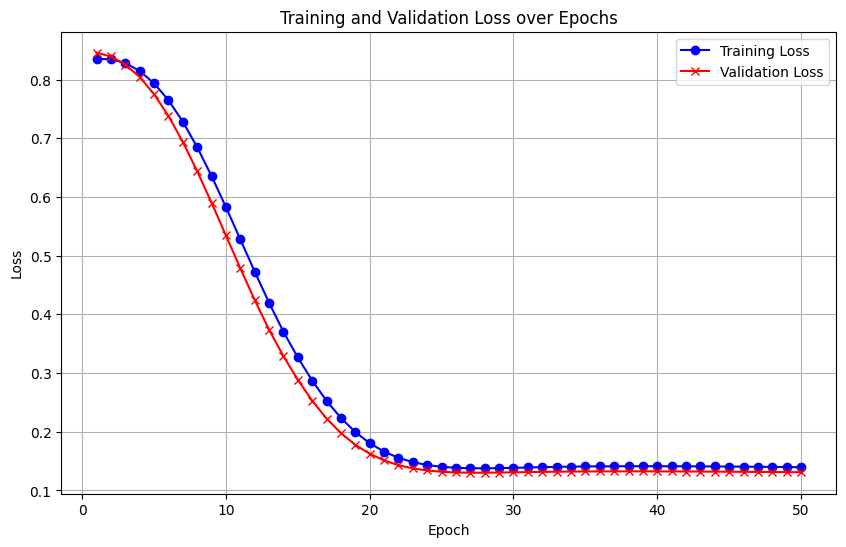

In [ ]:
plot_loss(train_loss_record, val_loss_record)

# Evaluation

# Test with data จริง

In [ ]:
min_index = val_loss_record.index(min(val_loss_record))
min_index

26

In [ ]:
model_path = get_model_path_MF(model, min_index, 0.005, 0.0)
state = torch.load(model_path)
model.load_state_dict(state)

<All keys matched successfully>

In [ ]:
train_data.columns

Index(['faculties_FACULTY OF LAW', 'faculties_FACULTY OF SCIENCE',
       'faculties_FACULTY OF POLITICAL SCIENCE',
       'faculties_SASIN GRADUATE INSTITUTE OF BUSINESS ADMINISTION',
       'faculties_FACULTY OF COMMERCE AND ACCOUNTANCY',
       'faculties_FACULTY OF ECONOMICS', 'faculties_FACULTY OF ENGINEERING',
       'faculties_FACULTY OF EDUCATION', 'faculties_FACULTY OF PSYCHOLOGY',
       'faculties_COLLEGE OF PUBLIC HEALTH SCIENCES', 'faculties_UNKNOWN',
       'faculties_FACULTY OF DENTISTRY',
       'faculties_FACULTY OF ALLIED HEALTH SCIENCES',
       'faculties_FACULTY OF PHARMACEUTICAL SCIENCES',
       'faculties_FACULTY OF VETERINARY SCIENCE',
       'faculties_FACULTY OF NURSING', 'faculties_FACULTY OF MEDICINE',
       'faculties_FACULTY OF ARTS',
       'faculties_THE SIRINDHORN THAI LANGUAGE INSTITUTE',
       'faculties_FACULTY OF COMMUNICATION ARTS',
       'faculties_LANGUAGE INSTITUTE',
       'faculties_FACULTY OF FINE AND APPLIED ARTS',
       'faculties_FACU

In [ ]:
users = pd.read_csv("Profile.csv")
users.head()

,profile_id,user_id,interests,location,filter_preferences,faculty,looking_for
0,0badeabf-dc73-4ad0-8d94-ebd191002b00,65c04ef0-b8b6-4666-a5e2-d748ef8b168d,"[""Female""]","{""coords"":{""latitude"":13.73637881730325,""longi...","{""1"": [""Cooking""]}",Faculty of Engineering,Long-term partner
1,135e593b-fa3a-4e3d-9d8d-4787eb40fa8f,2dc0cd69-7912-4006-8008-0c590c12a343,"[""Female""]","{""coords"":{""latitude"":13.735371,""longitude"":10...","{""1"": [""Bar""], ""2"": [""Curious""], ""3"": [""Having...",Faculty of Science,Long-term partner
2,19ff3a30-581b-45ae-883d-b6503ecb4c77,d5cb129c-d826-46a7-9421-dd9acf8e0dfe,"[""Female""]","{""coords"":{""latitude"":13.7343032,""longitude"":1...","{""1"": [""Reading""], ""2"": [""Thoughtful"", ""Confid...",Faculty of Engineering,Long-term partner
3,2d8c631a-99d4-4369-b3cf-cbe74d189bed,6273d3f3-262b-4f99-8b05-831b1c202747,"[""Interested in all genders""]","{""coords"":{""latitude"":13.744080061212829,""long...","{""1"": [""Movies & Shows"", ""Art"", ""Coffee""], ""2""...",Faculty of Science,Casual but long-term OK
4,3345e062-4d0c-4a07-8b90-bb667c267164,2192e439-0238-44a3-9e18-5b5bd2a438d6,"[""Female""]","{""coords"":{""latitude"":13.741363099122376,""long...","{""1"": [""Gym"", ""Travel"", ""Cooking""], ""2"": [""Tho...",Faculty of Commerce and Accountancy,Long-term partner


In [ ]:
import json

# Function to convert string to dictionary
def parse_filter_preferences(row):
    try:
        return json.loads(row.replace("'", "\""))
    except:
        return {}

# Apply the function to every row
users['filter_preferences'] = users['filter_preferences'].apply(parse_filter_preferences)

# Check the result
users['filter_preferences'].head()


,filter_preferences
0,{'1': ['Cooking']}
1,"{'1': ['Bar'], '2': ['Curious'], '3': ['Having..."
2,"{'1': ['Reading'], '2': ['Thoughtful', 'Confid..."
3,"{'1': ['Movies & Shows', 'Art', 'Coffee'], '2'..."
4,"{'1': ['Gym', 'Travel', 'Cooking'], '2': ['Tho..."


In [ ]:
# Extract hobbies, personality, values
users['hobbies'] = users['filter_preferences'].apply(lambda d: d.get("1", []))
users['personality'] = users['filter_preferences'].apply(lambda d: d.get("2", []))
users['values'] = users['filter_preferences'].apply(lambda d: d.get("3", []))

# Check the result
users[['hobbies', 'personality', 'values']].head()


,hobbies,personality,values
0,[Cooking],[],[]
1,[Bar],[Curious],[Having fun]
2,[Reading],"[Thoughtful, Confident]","[Respect, Having fun]"
3,"[Movies & Shows, Art, Coffee]",[],[Respect]
4,"[Gym, Travel, Cooking]",[Thoughtful],[Personal Growth]


In [ ]:
# Function to parse string list
def parse_list(val):
    try:
        return json.loads(val.replace("'", "\""))
    except:
        return []

# Apply it to interests column
users['interests'] = users['interests'].apply(parse_list)

# Check result
users['interests'].head()


,interests
0,[Female]
1,[Female]
2,[Female]
3,[Interested in all genders]
4,[Female]


In [ ]:
# 'goal_Long-term Partner', 'goal_Long-term/Casual', 'goal_Casual Fun', 'goal_New Friends',
# 'goal_Still figuring it out', 'goal_To say I did it',
users['looking_for']

,looking_for
0,Long-term partner
1,Long-term partner
2,Long-term partner
3,Casual but long-term OK
4,Long-term partner
5,Long-term partner
6,Long-term but casual OK
7,Still figuring it out
8,Long-term but casual OK
9,Long-term but casual OK


In [ ]:
goal_mapping = {
    'Long-term partner': 'Long-term Partner',
    'Casual but long-term OK': 'Long-term/Casual',
    'Long-term but casual OK': 'Long-term/Casual'
}

In [ ]:
def generate_dummies(df, col_name):
    if col_name == "faculty":
        train_col_name = "faculties"
        df[col_name] = df[col_name].str.upper().fillna('UNKNOWN')
    if col_name == "looking_for":
        train_col_name = "goal"
        df[col_name] = df[col_name].map(goal_mapping).fillna(df['looking_for'])
    dummies = pd.get_dummies(df[col_name], prefix=train_col_name)
    all = [x for x in train_data.columns if train_col_name in x]
    dummies = dummies.reindex(columns=all, fill_value=0)
    dummies = dummies.astype(int)
    return dummies
faculty_dummies = generate_dummies(users, 'faculty')
faculty_dummies.head()

,faculties_FACULTY OF LAW,faculties_FACULTY OF SCIENCE,faculties_FACULTY OF POLITICAL SCIENCE,faculties_SASIN GRADUATE INSTITUTE OF BUSINESS ADMINISTION,faculties_FACULTY OF COMMERCE AND ACCOUNTANCY,faculties_FACULTY OF ECONOMICS,faculties_FACULTY OF ENGINEERING,faculties_FACULTY OF EDUCATION,faculties_FACULTY OF PSYCHOLOGY,faculties_COLLEGE OF PUBLIC HEALTH SCIENCES,...,faculties_THE SIRINDHORN THAI LANGUAGE INSTITUTE,faculties_FACULTY OF COMMUNICATION ARTS,faculties_LANGUAGE INSTITUTE,faculties_FACULTY OF FINE AND APPLIED ARTS,faculties_FACULTY OF ARCHITECTURE,faculties_SCHOOL OF INTEGRATED INNOVATION,faculties_SCHOOL OF AGRICULTURAL RESOURCES,faculties_FACULTY OF SPORTS SCIENCE,faculties_GRADUATE SCHOOL,faculties_COLLEGE OF POPULATION STUDIES
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
goal_dummies = generate_dummies(users, "looking_for")
goal_dummies.head()

,goal_Long-term Partner,goal_Long-term/Casual,goal_Casual Fun,goal_New Friends,goal_Still figuring it out,goal_To say I did it
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,1,0,0,0,0,0


In [ ]:
users['interests'] = users['interests'].astype(str)

# Create interests_Male
users['interests_Male'] = users['interests'].apply(lambda x: 1 if ('Male' in x or 'Interested in all genders' in x) else 0)

# Create interests_Female
users['interests_Female'] = users['interests'].apply(lambda x: 1 if ('Female' in x or 'Interested in all genders' in x) else 0)

interest_dummies = users[['interests_Male', 'interests_Female']]
interest_dummies.head()

,interests_Male,interests_Female
0,0,1
1,0,1
2,0,1
3,1,1
4,0,1


Filter Preferences

In [ ]:
all_hobbies = [x for x in train_data.columns if 'hobbies' in x]
all_hobbies = [hobby.split("_")[1] for hobby in all_hobbies]
all_hobbies

['Travel',
 'Movies & Show',
 'Photography',
 'Grabbing a drink',
 'Music',
 'Sports',
 'Gym',
 'Cafe',
 'Nature',
 'Reading',
 'Video Games',
 'Food',
 'Pets',
 'Art',
 'Cooking',
 'Dancing']

In [ ]:
# Flatten all hobbies into one list
def check_invalid(df, col_name, all_val):
    all_in_data = sum(df[col_name], [])
    all_in_data = set(all_in_data)
    invalid = all_in_data - set(all_val)
    return invalid

invalid_hobbies = check_invalid(users, "hobbies", all_hobbies)

print("Invalid hobbies found in data:", invalid_hobbies)

Invalid hobbies found in data: {'Games', 'Movies & Shows', 'Coffee', 'Bar', 'Concert', 'Matcha'}


In [ ]:
hobbies_map = {
    "Matcha": "Cafe",
    "Movies & Shows": "Movies & Show",
    "Concert" : "Movies & Show",
    "Coffee" : "Cafe",
    "Bar": "Grabbing a drink",
    "Games": "Video Games"
}

In [ ]:
# Function to map hobbies
def map_hobbies(hobby_list):
    return [hobbies_map.get(hobby, hobby) for hobby in hobby_list]

# Apply to the column
users['hobbies'] = users['hobbies'].apply(map_hobbies)

In [ ]:
filter_preferences = pd.DataFrame()

In [ ]:
for hobby in all_hobbies:
    filter_preferences[f'hobbies_{hobby}'] = users['hobbies'].apply(lambda x: int(hobby in x))
filter_preferences

,hobbies_Travel,hobbies_Movies & Show,hobbies_Photography,hobbies_Grabbing a drink,hobbies_Music,hobbies_Sports,hobbies_Gym,hobbies_Cafe,hobbies_Nature,hobbies_Reading,hobbies_Video Games,hobbies_Food,hobbies_Pets,hobbies_Art,hobbies_Cooking,hobbies_Dancing
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
5,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
6,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
9,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0


In [ ]:
all_personality = [x for x in train_data.columns if 'personality' in x]
all_personality = [personality.split("_")[1] for personality in all_personality]
all_personality

['Cheerful',
 'Reliable',
 'Active',
 'Caring',
 'Introverted',
 'Organized',
 'Creative',
 'Thoughtful',
 'Confident',
 'Playful',
 'Ambitious',
 'Calm',
 'Chill']

In [ ]:
invalid_personality = check_invalid(users, "personality", all_personality)

print("Invalid personality found in data:", invalid_personality)

Invalid personality found in data: {'Curious', 'Positive Energy'}


In [ ]:
personality_map = {
    "Curious": "Creative",
    "Positive Energy" : "Cheerful"
}
def map_personality(personality_list):
    return [personality_map.get(personality, personality) for personality in personality_list]

users['personality'] = users['personality'].apply(map_personality)

In [ ]:
for personality in all_personality:
    filter_preferences[f'personality_{personality}'] = users['personality'].apply(lambda x: int(personality in x))
filter_preferences

,hobbies_Travel,hobbies_Movies & Show,hobbies_Photography,hobbies_Grabbing a drink,hobbies_Music,hobbies_Sports,hobbies_Gym,hobbies_Cafe,hobbies_Nature,hobbies_Reading,...,personality_Caring,personality_Introverted,personality_Organized,personality_Creative,personality_Thoughtful,personality_Confident,personality_Playful,personality_Ambitious,personality_Calm,personality_Chill
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
6,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
8,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
all_values = [x for x in train_data.columns if 'values' in x]
all_values = [value.split("_")[1] for value in all_values]
all_values

['Honesty and Trust',
 'Self-Growth',
 'Having fun',
 'Independence and Balance',
 'Meaningful Conversation',
 'Emotional Support and Empathy',
 'Physical Affection']

In [ ]:
invalid_values = check_invalid(users, "values", all_values)

print("Invalid values found in data:", invalid_values)

Invalid values found in data: {'Respect', 'Personal Growth', 'Honesty and trust'}


In [ ]:
values_map = {
    "Personal Growth": "Self-Growth",
    "Honesty and trust" : "Honesty and Trust",
    "Respect": "Honesty and Trust"
}
def map_values(values_list):
    return [values_map.get(value, value) for value in values_list]

users['values'] = users['values'].apply(map_values)

In [ ]:
for values in all_values:
    filter_preferences[f'values_{values}'] = users['values'].apply(lambda x: int(values in x))
filter_preferences

,hobbies_Travel,hobbies_Movies & Show,hobbies_Photography,hobbies_Grabbing a drink,hobbies_Music,hobbies_Sports,hobbies_Gym,hobbies_Cafe,hobbies_Nature,hobbies_Reading,...,personality_Ambitious,personality_Calm,personality_Chill,values_Honesty and Trust,values_Self-Growth,values_Having fun,values_Independence and Balance,values_Meaningful Conversation,values_Emotional Support and Empathy,values_Physical Affection
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
6,0,1,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
8,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
users["user_id"]

,user_id
0,65c04ef0-b8b6-4666-a5e2-d748ef8b168d
1,2dc0cd69-7912-4006-8008-0c590c12a343
2,d5cb129c-d826-46a7-9421-dd9acf8e0dfe
3,6273d3f3-262b-4f99-8b05-831b1c202747
4,2192e439-0238-44a3-9e18-5b5bd2a438d6
5,b4f0879b-7871-4b8f-b41f-c6cbcfb7dccc
6,020fd54b-c125-45ac-b4ee-d49a4baecee2
7,a39926ae-ee9b-41de-9411-6d94e13d008f
8,72cd8a57-e40b-4a2c-947b-88bb172b79a8
9,dffdb650-de0c-4160-a166-eb6bd5ad4c2e


In [ ]:
profile = pd.read_csv("User.csv")
profile.head()

,user_id,email,password_hash,name,age,gender,bio,created_at,updated_at,profile_photo
0,01324c6d-8a1b-4151-be3e-30410c830abc,6340082428@student.chula.ac.th,NaN,นิชา สามไพบูลย์,22,female,"nitade cu | cats, jpn, disney🫶🏻",2025-02-14 16:01:48.999,2025-02-14 16:01:49.001,{https://wccodzjjngckwphlctsn.supabase.co/stor...
1,020fd54b-c125-45ac-b4ee-d49a4baecee2,6534441023@student.chula.ac.th,NaN,Phongsakorn Phimphongphaisan,20,male,180 cm no vaping person,2025-02-14 15:23:18.048,2025-02-14 15:23:18.049,{https://wccodzjjngckwphlctsn.supabase.co/stor...
2,2192e439-0238-44a3-9e18-5b5bd2a438d6,6741202426@student.chula.ac.th,NaN,Vagoon Natrum,19,female,Shi85 cu108,2025-02-14 16:10:57.748,2025-02-14 16:10:57.749,{https://wccodzjjngckwphlctsn.supabase.co/stor...
3,2dc0cd69-7912-4006-8008-0c590c12a343,6534435223@student.chula.ac.th,NaN,Bunyawat Naunnak,27,male,999999999999,2025-02-15 13:38:14.362,2025-02-15 13:38:14.701,{https://wccodzjjngckwphlctsn.supabase.co/stor...
4,4ac081cb-3792-4995-a7dd-78190c72bcaf,6733023037@student.chula.ac.th,NaN,Rattapoom Thongchiao,18,male,hellothailand,2025-02-14 17:01:24.58,2025-02-14 17:01:24.582,{https://wccodzjjngckwphlctsn.supabase.co/stor...


In [ ]:
users = users.merge(profile[['user_id', 'age', 'gender']], on='user_id', how='left')
users[['user_id','age','gender']]

,user_id,age,gender
0,65c04ef0-b8b6-4666-a5e2-d748ef8b168d,21,male
1,2dc0cd69-7912-4006-8008-0c590c12a343,27,male
2,d5cb129c-d826-46a7-9421-dd9acf8e0dfe,19,male
3,6273d3f3-262b-4f99-8b05-831b1c202747,19,female
4,2192e439-0238-44a3-9e18-5b5bd2a438d6,19,female
5,b4f0879b-7871-4b8f-b41f-c6cbcfb7dccc,20,male
6,020fd54b-c125-45ac-b4ee-d49a4baecee2,20,male
7,a39926ae-ee9b-41de-9411-6d94e13d008f,20,female
8,72cd8a57-e40b-4a2c-947b-88bb172b79a8,19,female
9,dffdb650-de0c-4160-a166-eb6bd5ad4c2e,19,female


In [ ]:
gender_mapping = {
    "male": "Male",
    "female": "Female"
}

In [ ]:
users['gender'] = users['gender'].map(gender_mapping)
users['gender']


,gender
0,Male
1,Male
2,Male
3,Female
4,Female
5,Male
6,Male
7,Female
8,Female
9,Female


In [ ]:
gender_dummies = pd.get_dummies(users['gender'], prefix="gender")
gender_dummies = gender_dummies.astype(int)
gender_dummies

,gender_Female,gender_Male
0,0,1
1,0,1
2,0,1
3,1,0
4,1,0
5,0,1
6,0,1
7,1,0
8,1,0
9,1,0


In [ ]:
# Combine all feature sets
final_df = pd.concat([
    faculty_dummies,
    goal_dummies,
    filter_preferences,
    gender_dummies,
    users[['age']],
    interest_dummies,
    users[['user_id']]
], axis=1)

# Check result
final_df

,faculties_FACULTY OF LAW,faculties_FACULTY OF SCIENCE,faculties_FACULTY OF POLITICAL SCIENCE,faculties_SASIN GRADUATE INSTITUTE OF BUSINESS ADMINISTION,faculties_FACULTY OF COMMERCE AND ACCOUNTANCY,faculties_FACULTY OF ECONOMICS,faculties_FACULTY OF ENGINEERING,faculties_FACULTY OF EDUCATION,faculties_FACULTY OF PSYCHOLOGY,faculties_COLLEGE OF PUBLIC HEALTH SCIENCES,...,values_Independence and Balance,values_Meaningful Conversation,values_Emotional Support and Empathy,values_Physical Affection,gender_Female,gender_Male,age,interests_Male,interests_Female,user_id
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,21,0,1,65c04ef0-b8b6-4666-a5e2-d748ef8b168d
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,27,0,1,2dc0cd69-7912-4006-8008-0c590c12a343
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,19,0,1,d5cb129c-d826-46a7-9421-dd9acf8e0dfe
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,19,1,1,6273d3f3-262b-4f99-8b05-831b1c202747
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,19,0,1,2192e439-0238-44a3-9e18-5b5bd2a438d6
5,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,20,0,1,b4f0879b-7871-4b8f-b41f-c6cbcfb7dccc
6,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,20,0,1,020fd54b-c125-45ac-b4ee-d49a4baecee2
7,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,20,0,1,a39926ae-ee9b-41de-9411-6d94e13d008f
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,19,1,0,72cd8a57-e40b-4a2c-947b-88bb172b79a8
9,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,19,1,0,dffdb650-de0c-4160-a166-eb6bd5ad4c2e


In [ ]:
len(final_df.columns)

76

In [ ]:
len(train_data.columns)

78

In [ ]:
users_df = final_df.drop(columns=['user_id'])

temp = train_data.drop(columns=['iid','pid','match'])

In [ ]:
# Get the column order from train_data
train_columns = temp.columns.tolist()

# Reorder final_df to match train_data's column order
users_df = users_df[train_columns]
users_df.head()

,faculties_FACULTY OF LAW,faculties_FACULTY OF SCIENCE,faculties_FACULTY OF POLITICAL SCIENCE,faculties_SASIN GRADUATE INSTITUTE OF BUSINESS ADMINISTION,faculties_FACULTY OF COMMERCE AND ACCOUNTANCY,faculties_FACULTY OF ECONOMICS,faculties_FACULTY OF ENGINEERING,faculties_FACULTY OF EDUCATION,faculties_FACULTY OF PSYCHOLOGY,faculties_COLLEGE OF PUBLIC HEALTH SCIENCES,...,values_Having fun,values_Independence and Balance,values_Meaningful Conversation,values_Emotional Support and Empathy,values_Physical Affection,gender_Male,gender_Female,age,interests_Male,interests_Female
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,21,0,1
1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,27,0,1
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,19,0,1
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,19,1,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,19,0,1


In [ ]:
inf_users = torch.tensor(users_df.values, dtype=torch.float32)

In [ ]:
num_users = len(users_df)

# Initialize the compatibility matrix
compatibility_matrix = np.zeros((num_users, num_users))

for i in range(num_users):
    for j in range(num_users):
        if i != j:  # Skip self-compatibility (or set to 1.0 if desired)
            # Get user i's data and user j's data
            user_i_data = inf_users[i].unsqueeze(0)
            user_j_data = inf_users[j].unsqueeze(0)

            # Create input for model: [user_i_features, user_j_features]
            compatibility_score = model(user_i_data, user_j_data)

            compatibility_matrix[i, j] = compatibility_score
        else:
            # Self-compatibility - you can set this to 1.0 or 0 based on your needs
            compatibility_matrix[i, j] = -1
print(compatibility_matrix)

[[-1.          0.17536107  0.17479306  0.17518201  0.17447075  0.17609447
   0.17545423  0.17550975  0.17557341  0.17564166  0.1746397   0.17595807
   0.17527705  0.17539153  0.17485183  0.17425141  0.17531767]
 [ 0.17531791 -1.          0.17470244  0.17508978  0.17437959  0.17600214
   0.17536104  0.17541876  0.17548001  0.1755513   0.17455414  0.1758621
   0.17518565  0.17530188  0.17476025  0.17415863  0.1752283 ]
 [ 0.17426822  0.17422301 -1.          0.1740419   0.17333108  0.17495093
   0.17431337  0.17436743  0.17443153  0.17450002  0.17350674  0.1748127
   0.17413786  0.17425323  0.17371547  0.17311689  0.17417806]
 [ 0.17356414  0.17352188  0.17295301 -1.          0.17263627  0.17424408
   0.17360857  0.17366433  0.17372787  0.1737982   0.17280498  0.17410785
   0.17343074  0.17354885  0.1730071   0.17241162  0.17347229]
 [ 0.17323157  0.17318997  0.17261937  0.17300877 -1.          0.17391095
   0.17327476  0.17333075  0.17339468  0.17346659  0.17247415  0.17377383
   0.17309

In [ ]:
compatibility_matrix[:4, :4]


array([[-1.        ,  0.17536107,  0.17479306,  0.17518201],
       [ 0.17531791, -1.        ,  0.17470244,  0.17508978],
       [ 0.17426822,  0.17422301, -1.        ,  0.1740419 ],
       [ 0.17356414,  0.17352188,  0.17295301, -1.        ]])

# Useful functions

In [ ]:
users[["user_id"]]

,user_id
0,65c04ef0-b8b6-4666-a5e2-d748ef8b168d
1,2dc0cd69-7912-4006-8008-0c590c12a343
2,d5cb129c-d826-46a7-9421-dd9acf8e0dfe
3,6273d3f3-262b-4f99-8b05-831b1c202747
4,2192e439-0238-44a3-9e18-5b5bd2a438d6
5,b4f0879b-7871-4b8f-b41f-c6cbcfb7dccc
6,020fd54b-c125-45ac-b4ee-d49a4baecee2
7,a39926ae-ee9b-41de-9411-6d94e13d008f
8,72cd8a57-e40b-4a2c-947b-88bb172b79a8
9,dffdb650-de0c-4160-a166-eb6bd5ad4c2e


dtype('O')

In [ ]:
def get_partners(user_id):
  '''
      input: user_id
      return: list of partners sorted by compatibility score descendingly
  '''
  def get_index_by_user_id(df, target_user_id):
      df = df.copy()
      df['user_id'] = df['user_id'].astype(str)
      match = df.index[df['user_id'] == target_user_id].tolist()
      return match[0] if match else -1
  user_index = get_index_by_user_id(users, user_id)
  compatibility_scores = compatibility_matrix[user_index, :]
  sorted_indices = np.argsort(-compatibility_scores)
  best_user_ids = users.loc[sorted_indices, 'user_id'].tolist()
  return best_user_ids

get_partners("65c04ef0-b8b6-4666-a5e2-d748ef8b168d")



['b4f0879b-7871-4b8f-b41f-c6cbcfb7dccc',
 '4ac081cb-3792-4995-a7dd-78190c72bcaf',
 'dffdb650-de0c-4160-a166-eb6bd5ad4c2e',
 '72cd8a57-e40b-4a2c-947b-88bb172b79a8',
 'a39926ae-ee9b-41de-9411-6d94e13d008f',
 '020fd54b-c125-45ac-b4ee-d49a4baecee2',
 'e6ed53be-983c-4387-bf50-dd4c1395f309',
 '2dc0cd69-7912-4006-8008-0c590c12a343',
 '01324c6d-8a1b-4151-be3e-30410c830abc',
 '607ec866-af45-42bd-8bf0-97aa2fba4b93',
 '6273d3f3-262b-4f99-8b05-831b1c202747',
 '63b41bee-a2cb-4dee-88e5-19520655b7b7',
 'd5cb129c-d826-46a7-9421-dd9acf8e0dfe',
 'f440d0a0-0348-439d-b10f-ac7054a91419',
 '2192e439-0238-44a3-9e18-5b5bd2a438d6',
 'a375b055-8f1b-4d41-91dc-d69f556ba755',
 '65c04ef0-b8b6-4666-a5e2-d748ef8b168d']